# Ocular Disease Recognition

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/Users/avina/Ocular_Disease_Recognition/EyeDisease'):
    print(dirname)

/Users/avina/Ocular_Disease_Recognition/EyeDisease
/Users/avina/Ocular_Disease_Recognition/EyeDisease\ODIR-5K
/Users/avina/Ocular_Disease_Recognition/EyeDisease\ODIR-5K\ODIR-5K
/Users/avina/Ocular_Disease_Recognition/EyeDisease\ODIR-5K\ODIR-5K\Testing Images
/Users/avina/Ocular_Disease_Recognition/EyeDisease\ODIR-5K\ODIR-5K\Training Images
/Users/avina/Ocular_Disease_Recognition/EyeDisease\preprocessed_images


In [2]:
df = pd.read_csv("C:/Users/avina/Ocular_Disease_Recognition/EyeDisease/full_df.csv")
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [3]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [4]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [5]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [6]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [7]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [8]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
print(left_normal[:15])
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
print(right_normal[:15])

['3332_left.jpg' '4059_left.jpg' '69_left.jpg' '2415_left.jpg'
 '4176_left.jpg' '2711_left.jpg' '4614_left.jpg' '3174_left.jpg'
 '2862_left.jpg' '2424_left.jpg' '3193_left.jpg' '3306_left.jpg'
 '2961_left.jpg' '2425_left.jpg' '2858_left.jpg']
['2964_right.jpg' '680_right.jpg' '500_right.jpg' '2368_right.jpg'
 '2820_right.jpg' '2769_right.jpg' '2696_right.jpg' '2890_right.jpg'
 '940_right.jpg' '2553_right.jpg' '3371_right.jpg' '3042_right.jpg'
 '919_right.jpg' '3427_right.jpg' '379_right.jpg']


In [9]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [10]:
print(len(cataract),len(normal))

594 500


In [21]:
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array
datasetloc = "C:/Users/avina/Ocular_Disease_Recognition/EyeDisease/preprocessed_images"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(datasetloc,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [22]:
dataset = create_dataset(cataract,1)
len(dataset)

100%|██████████| 594/594 [00:08<00:00, 66.96it/s] 


588

In [23]:
dataset = create_dataset(normal,0)
len(dataset)

100%|██████████| 500/500 [00:10<00:00, 48.66it/s]


1088

In [24]:
print("Dataset length:", len(dataset))

Dataset length: 1088


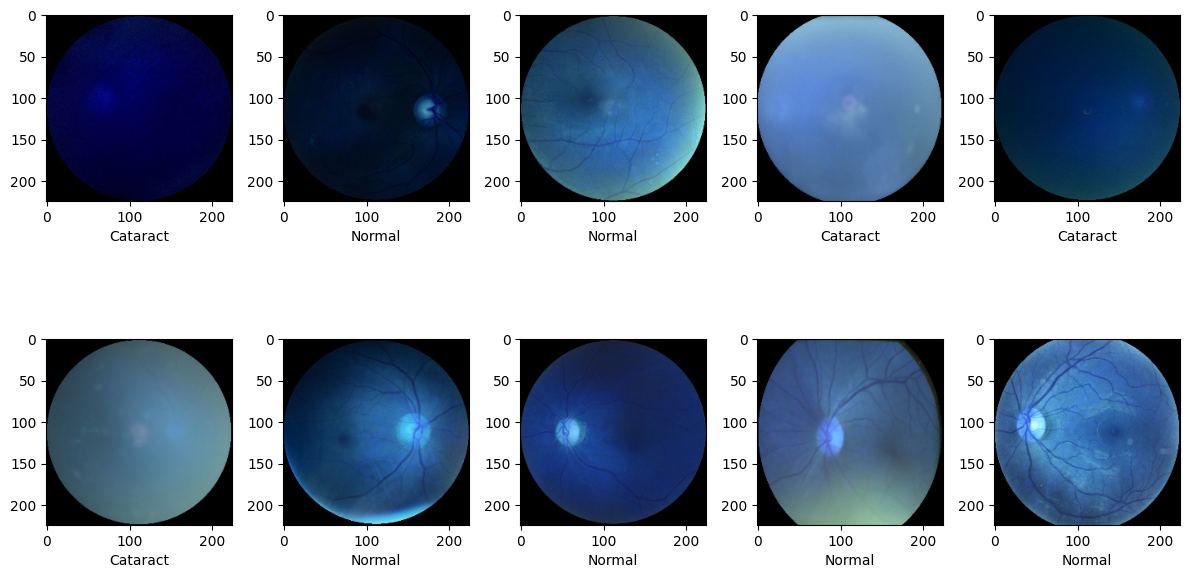

In [25]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()    

In [26]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## VGG19

In [29]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

In [30]:
for layer in vgg.layers:
    layer.trainable = False

In [50]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model1 = Sequential()
model1.add(vgg)
model1.add(Flatten())
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │        25,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,049,473 (76.48 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [32]:
model1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    "vgg19.h5",
    monitor="val_accuracy",     # ✅ 'val_acc' is deprecated; use 'val_accuracy'
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    save_freq='epoch'           # ✅ Replaces deprecated `period`
)

earlystop = EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    verbose=1
)


In [36]:
history1 = model1.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8255 - loss: 1.8167
Epoch 1: val_accuracy improved from -inf to 0.92661, saving model to vgg19.h5


28/28 ━━━━━━━━━━━━━━━━━━━━ 313s 11s/step - accuracy: 0.8280 - loss: 1.8020 - val_accuracy: 0.9266 - val_loss: 0.8709
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 30s/step - accuracy: 0.9518 - loss: 0.6082 
Epoch 2: val_accuracy improved from 0.92661 to 0.93578, saving model to vgg19.h5


28/28 ━━━━━━━━━━━━━━━━━━━━ 866s 32s/step - accuracy: 0.9520 - loss: 0.6009 - val_accuracy: 0.9358 - val_loss: 0.7606
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.9843 - loss: 0.1318 
Epoch 3: val_accuracy did not improve from 0.93578
28/28 ━━━━━━━━━━━━━━━━━━━━ 408s 15s/step - accuracy: 0.9842 - loss: 0.1336 - val_accuracy: 0.9358 - val_loss: 1.0097
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9919 - loss: 0.0357
Epoch 4: val_accuracy improved from 0.93578 to 0.94954, saving model to vgg19.h5


28/28 ━━━━━━━━━━━━━━━━━━━━ 320s 12s/step - accuracy: 0.9919 - loss: 0.0361 - val_accuracy: 0.9495 - val_loss: 0.5970
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9983 - loss: 0.0063 
Epoch 5: val_accuracy improved from 0.94954 to 0.95872, saving model to vgg19.h5


28/28 ━━━━━━━━━━━━━━━━━━━━ 519s 19s/step - accuracy: 0.9983 - loss: 0.0064 - val_accuracy: 0.9587 - val_loss: 0.5766
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9966 - loss: 0.0232 
Epoch 6: val_accuracy did not improve from 0.95872
28/28 ━━━━━━━━━━━━━━━━━━━━ 519s 19s/step - accuracy: 0.9966 - loss: 0.0234 - val_accuracy: 0.9541 - val_loss: 0.8059
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 31s/step - accuracy: 0.9969 - loss: 0.0070 
Epoch 7: val_accuracy did not improve from 0.95872
28/28 ━━━━━━━━━━━━━━━━━━━━ 960s 33s/step - accuracy: 0.9969 - loss: 0.0069 - val_accuracy: 0.9495 - val_loss: 0.7919
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9998 - loss: 0.0011   
Epoch 8: val_accuracy did not improve from 0.95872
28/28 ━━━━━━━━━━━━━━━━━━━━ 324s 12s/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9587 - val_loss: 0.7571
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.9986 - loss: 0.0018 
Epoch 9: val_accuracy did not improve 

In [37]:
loss,accuracy = model1.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 52s 7s/step - accuracy: 0.9731 - loss: 0.5240
loss: 0.7167620062828064
Accuracy: 0.9587156176567078


In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred1 = (model1.predict(x_test) > 0.5).astype("int32")
accuracy_score(y_test, y_pred1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 59s 9s/step


0.9587155963302753

In [39]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        94
           1       0.98      0.95      0.96       124

    accuracy                           0.96       218
   macro avg       0.96      0.96      0.96       218
weighted avg       0.96      0.96      0.96       218



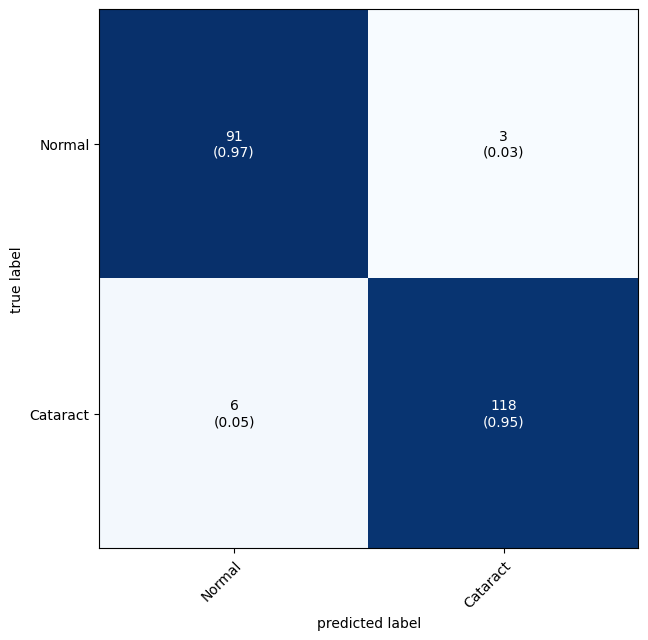

In [41]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred1)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

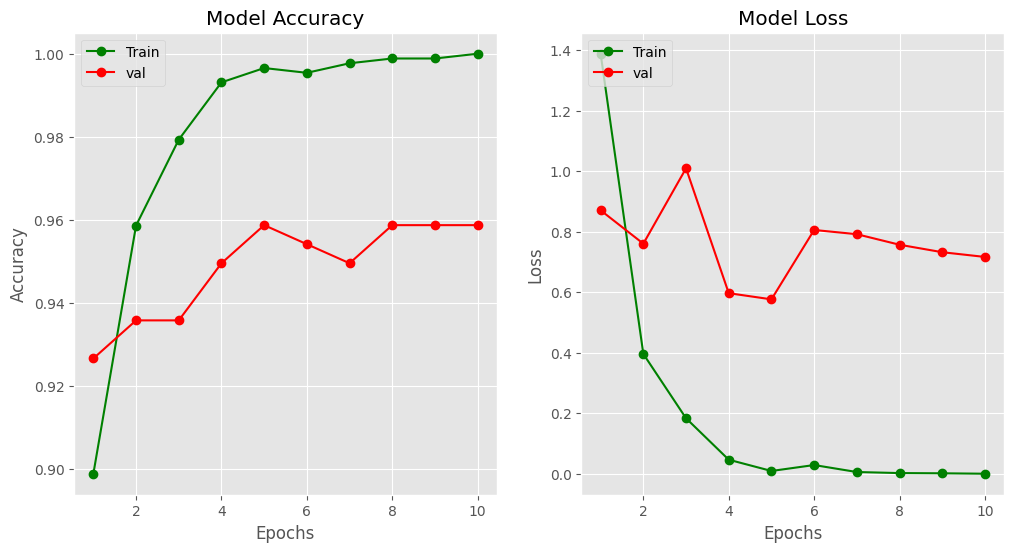

In [42]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,history1.history["accuracy"],"go-")
plt.plot(epochs,history1.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history1.history["loss"],"go-")
plt.plot(epochs,history1.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

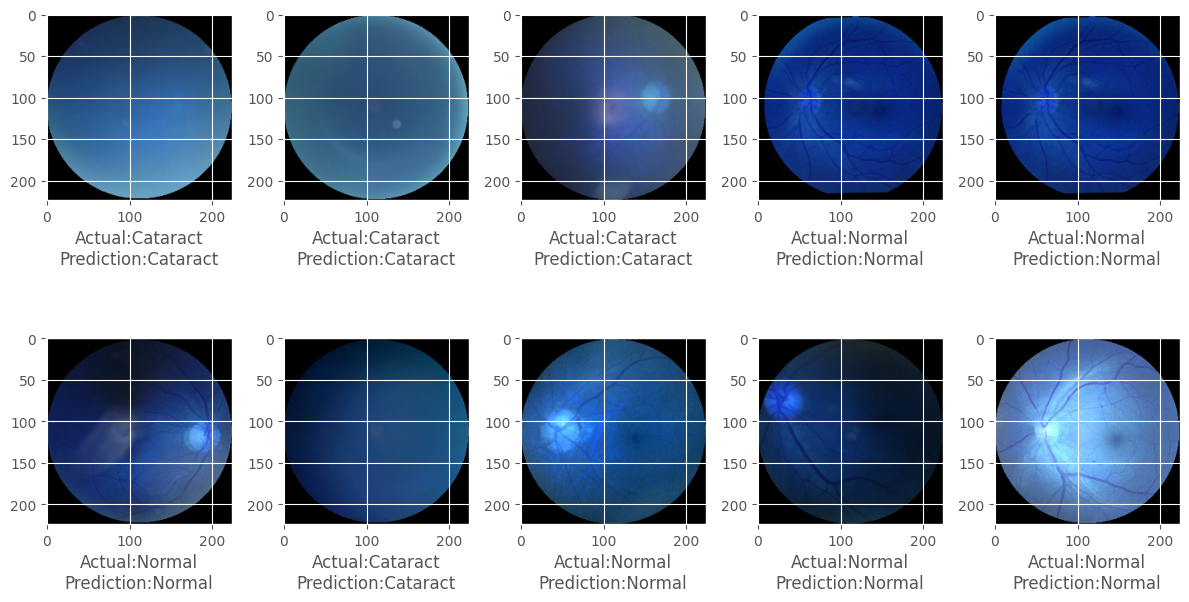

In [43]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred1[sample]
    
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
        
    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"
        
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout() 

## ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
rnet = ResNet50(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in rnet.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model2 = Sequential()
model2.add(rnet)
model2.add(Flatten())
model2.add(Dense(1,activation="sigmoid"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 100353    
Total params: 23,688,065
Trainable params: 100,353
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("rnet50.h5",monitor="val_acc",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [ ]:
history2 = model2.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/10
3/3 [==============================] - 6s 1s/step - loss: 4.7494 - accuracy: 0.5362 - val_loss: 5.9886 - val_accuracy: 0.6111
Epoch 2/10
3/3 [==============================] - 0s 89ms/step - loss: 5.2944 - accuracy: 0.6667 - val_loss: 7.5360 - val_accuracy: 0.6111
Epoch 3/10
3/3 [==============================] - 0s 91ms/step - loss: 3.3635 - accuracy: 0.7246 - val_loss: 1.0424 - val_accuracy: 0.8333
Epoch 4/10
3/3 [==============================] - 0s 89ms/step - loss: 0.8936 - accuracy: 0.9275 - val_loss: 1.3309 - val_accuracy: 0.8889
Epoch 5/10
3/3 [==============================] - 0s 90ms/step - loss: 0.9527 - accuracy: 0.8986 - val_loss: 0.6520 - val_accuracy: 0.9444
Epoch 6/10
3/3 [==============================] - 0s 89ms/step - loss: 0.5157 - accuracy: 0.9565 - val_loss: 1.3503 - val_accuracy: 0.7222
Epoch 7/10
3/3 [==============================] - 0s 89ms/step - loss: 0.4022 - accuracy: 0.9275 - val_loss: 2.1451 - val_accuracy: 0.7222
Epoch 8/10
3/3 [=============

In [ ]:
loss,accuracy = model2.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

1/1 [==============================] - 0s 66ms/step - loss: 0.0082 - accuracy: 1.0000
loss: 0.008168929256498814
Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred2 = (model2.predict(x_test) > 0.5).astype("int32")
accuracy_score(y_test, y_pred2)

1.0

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



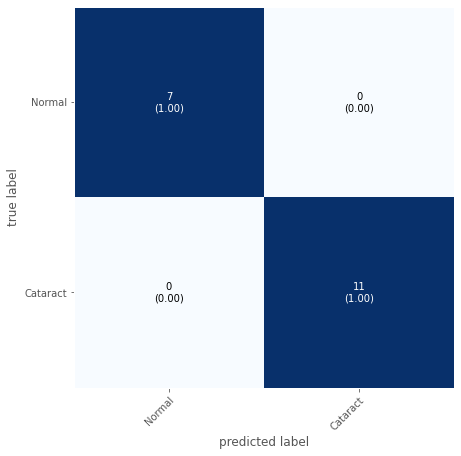

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred2)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

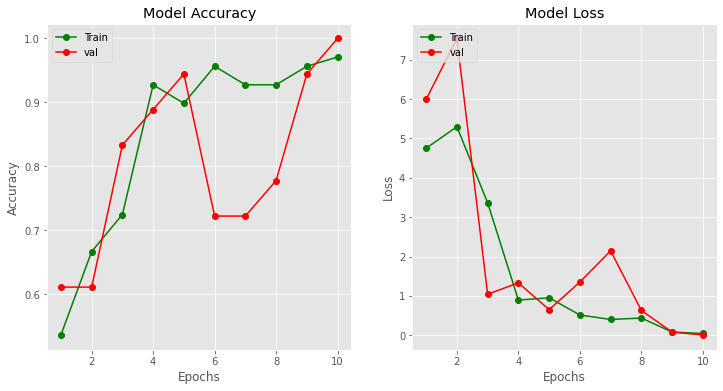

In [ ]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,history2.history["accuracy"],"go-")
plt.plot(epochs,history2.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history2.history["loss"],"go-")
plt.plot(epochs,history2.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

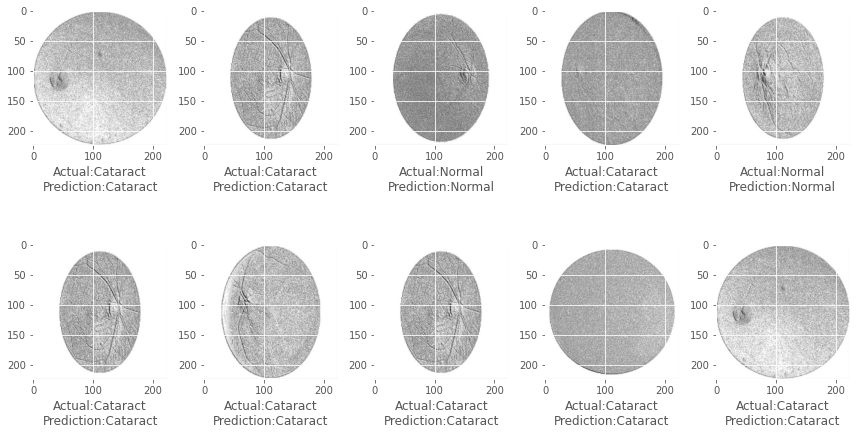

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred2[sample]
    
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
        
    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"
        
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout() 

## Vision transformers

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
num_classes = 2
input_shape = (224, 224, 3)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (69, 224, 224, 3) - y_train shape: (69,)
x_test shape: (18, 224, 224, 3) - y_test shape: (18,)


In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
image_size = 128 # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 6
mlp_head_units = [512, 256]  # Size of the dense layers of the final classifier

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 128 X 128
Patch size: 6 X 6
Patches per image: 441
Elements per patch: 108


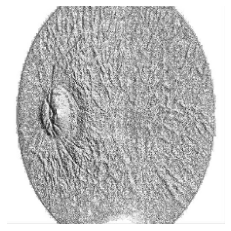

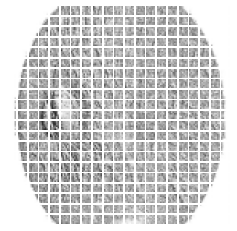

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.2)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model3 = keras.Model(inputs=inputs, outputs=logits)
    return model3

In [ ]:
model3 = create_vit_classifier()
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
data_augmentation (Sequential)  (None, 128, 128, 3)  7           input_3[0][0]                    
__________________________________________________________________________________________________
patches_1 (Patches)             (None, None, 108)    0           data_augmentation[0][0]          
__________________________________________________________________________________________________
patch_encoder (PatchEncoder)    (None, 441, 64)      35200       patches_1[0][0]                  
______________________________________________________________________________________________

In [ ]:
num_epochs = 30

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

model3.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
        ],
    )

checkpoint_filepath = "/tmp/checkpoint"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,)
    
#earlystop = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1)

history3 = model3.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

model3.load_weights(checkpoint_filepath)
_, accuracy = model3.evaluate(x_test, y_test)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

Epoch 1/30
2/2 [==============================] - 9s 1s/step - loss: 4.6294 - accuracy: 0.6290 - val_loss: 18.6339 - val_accuracy: 0.4286
Epoch 2/30
2/2 [==============================] - 0s 214ms/step - loss: 14.7524 - accuracy: 0.4516 - val_loss: 6.4668 - val_accuracy: 0.5714
Epoch 3/30
2/2 [==============================] - 0s 210ms/step - loss: 3.1464 - accuracy: 0.6452 - val_loss: 2.0781 - val_accuracy: 0.7143
Epoch 4/30
2/2 [==============================] - 0s 212ms/step - loss: 1.5662 - accuracy: 0.7097 - val_loss: 2.4926 - val_accuracy: 0.5714
Epoch 5/30
2/2 [==============================] - 0s 218ms/step - loss: 3.3572 - accuracy: 0.4839 - val_loss: 0.9841 - val_accuracy: 0.5714
Epoch 6/30
2/2 [==============================] - 0s 251ms/step - loss: 1.7732 - accuracy: 0.6613 - val_loss: 0.9495 - val_accuracy: 0.7143
Epoch 7/30
2/2 [==============================] - 0s 209ms/step - loss: 1.6348 - accuracy: 0.6129 - val_loss: 1.8468 - val_accuracy: 0.5714
Epoch 8/30
2/2 [=====

In [ ]:
loss, accuracy = model3.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

1/1 [==============================] - 0s 52ms/step - loss: 0.8491 - accuracy: 0.5556
loss: 0.849109947681427
Accuracy: 0.5555555820465088


In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

In [ ]:
len(val_acc),len(val_loss),len(acc),len(loss)

(30, 30, 30, 30)

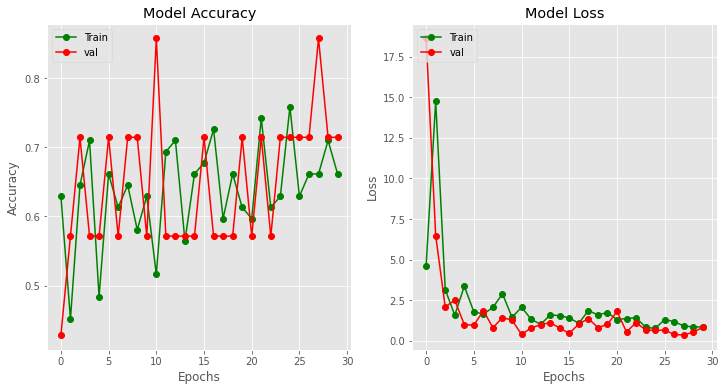

In [ ]:
import matplotlib.pyplot as plt
EPOCHS = 30

plt.style.use("ggplot")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history3.history['accuracy'],"go-")
plt.plot(range(EPOCHS), history3.history['val_accuracy'],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history3.history['loss'],"go-")
plt.plot(range(EPOCHS), history3.history['val_loss'],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

# Comparison

In [ ]:
accloss = {'Model':['VGG19','ResNet50','Vision Transformer'],
           'Training_Accuracy':[max(history1.history['accuracy']),max(history2.history['accuracy']),max(history3.history['accuracy'])],
           'Training_Loss':[min(history1.history['loss']),min(history2.history['loss']),min(history3.history['loss'])],
           'Validation_Accuracy':[max(history1.history['val_accuracy']),max(history2.history['val_accuracy']),max(history3.history['val_accuracy'])],
           'Validation_Loss':[min(history1.history['val_loss']),min(history2.history['val_loss']),min(history3.history['val_loss'])]}

In [ ]:
accloss

{'Model': ['VGG19', 'ResNet50', 'Vision Transformer'],
 'Training_Accuracy': [1.0, 0.9710144996643066, 0.7580645084381104],
 'Training_Loss': [0.004896808415651321,
  0.04603179171681404,
  0.7465403079986572],
 'Validation_Accuracy': [0.9444444179534912, 1.0, 0.8571428656578064],
 'Validation_Loss': [0.0996314138174057,
  0.008168929256498814,
  0.34533166885375977]}

In [ ]:
comp = pd.DataFrame.from_dict(accloss)
comp

,Model,Training_Accuracy,Training_Loss,Validation_Accuracy,Validation_Loss
0,VGG19,1.000000,0.004897,0.944444,0.099631
1,ResNet50,0.971014,0.046032,1.000000,0.008169
2,Vision Transformer,0.758065,0.746540,0.857143,0.345332
